# RPV dataset plots

Let's look at the kinematics across RPV datasets. I.e., let's get a sense for how the kinematics change across the sparticle mass parameters.

In [1]:
# Convenient fudge for python path
import sys
sys.path.append('..')

In [2]:
# Compatibility
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import

# Externals
import numpy as np
import matplotlib.pyplot as plt

# Locals
from atlasgan.reco import compute_physics_variables

%matplotlib notebook

## Load the data

In [3]:
input_files = [
    '/global/cscratch1/sd/sfarrell/atlas_gan/data_split/RPV10_1400_850_01_test.npz',
    '/global/cscratch1/sd/sfarrell/atlas_gan/data_split/RPV10_1600_850_01_test.npz',
    '/global/cscratch1/sd/sfarrell/atlas_gan/data_split/RPV10_1700_850_01_test.npz',
    '/global/cscratch1/sd/sfarrell/atlas_gan/data_split/RPV10_1800_850_01_test.npz',
    '/global/cscratch1/sd/sfarrell/atlas_gan/data_split/RPV10_1900_850_01_test.npz',
]

In [4]:
n_test = 8192

In [5]:
def process_file(file_name, n_test):
    with np.load(file_name) as f:
        data = f['hist'][:n_test].astype(np.float32)
    return data

In [6]:
images = [process_file(f, n_test) for f in input_files]

In [7]:
images[0].shape

(8192, 64, 64)

## Reconstruct the events

In [8]:
%%time
variables = [compute_physics_variables(ims) for ims in images]

CPU times: user 57.1 s, sys: 777 ms, total: 57.9 s
Wall time: 57.9 s


In [9]:
variables[0].keys()

dict_keys(['nJet', 'sumMass', 'jetPt', 'jetEta', 'jetPhi'])

## Plot the kinematics

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


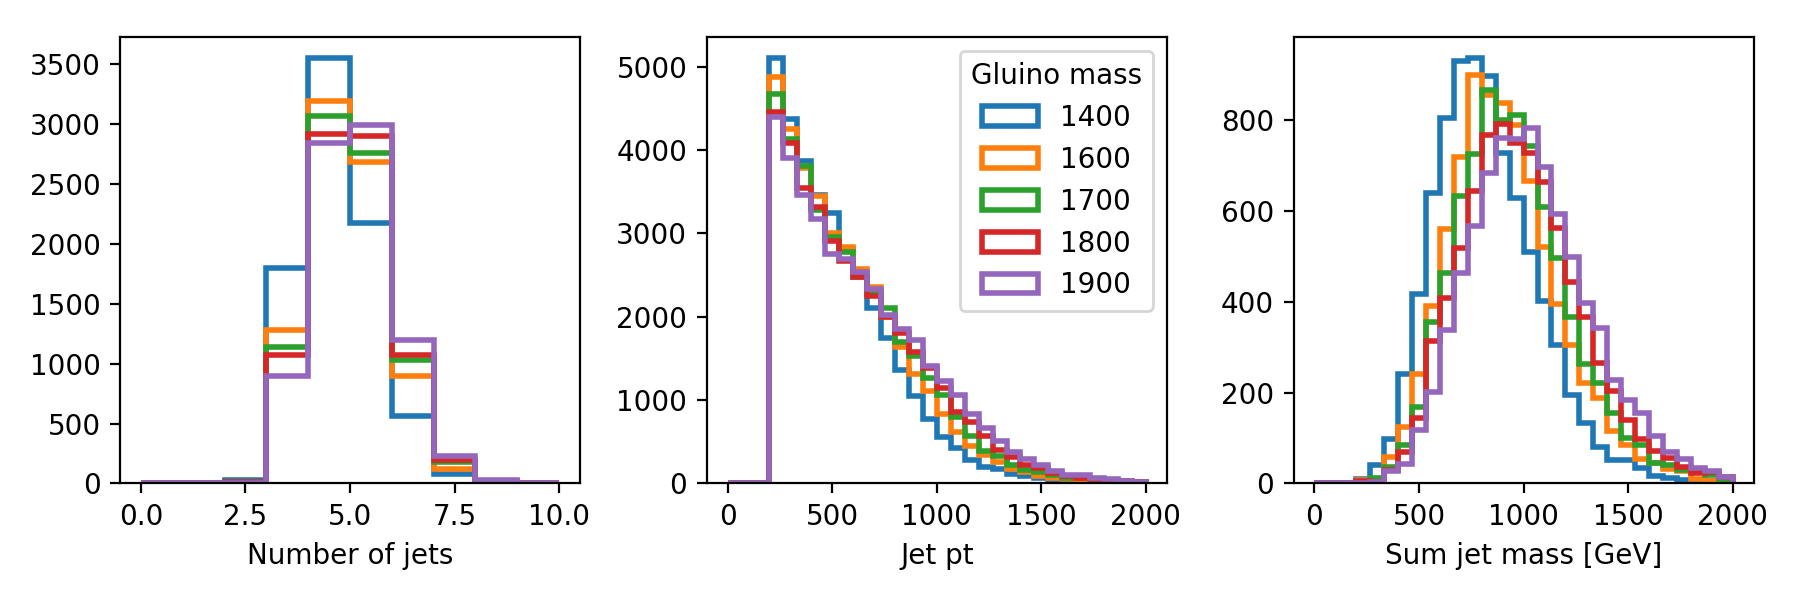

In [11]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(9,3))

key = 'sumMass'
labels = ['1400', '1600', '1700', '1800', '1900']
lw = 2
for v, label in zip(variables, labels):
    ax0.hist(v['nJet'], bins=10, range=(0, 10), log=False, histtype='step', linewidth=lw, label=label)
    ax1.hist(v['jetPt']*1e-3, bins=30, range=(0, 2e3), histtype='step', linewidth=lw, log=False, label=label)
    ax2.hist(v['sumMass']*1e-3, bins=30, range=(0, 2e3), log=False, histtype='step', linewidth=lw, label=label)
#
ax0.set_xlabel('Number of jets')
ax1.set_xlabel('Jet pt')
ax2.set_xlabel('Sum jet mass [GeV]')
ax1.legend(title='Gluino mass', loc=0)
plt.tight_layout()

<IPython.core.display.Javascript object>


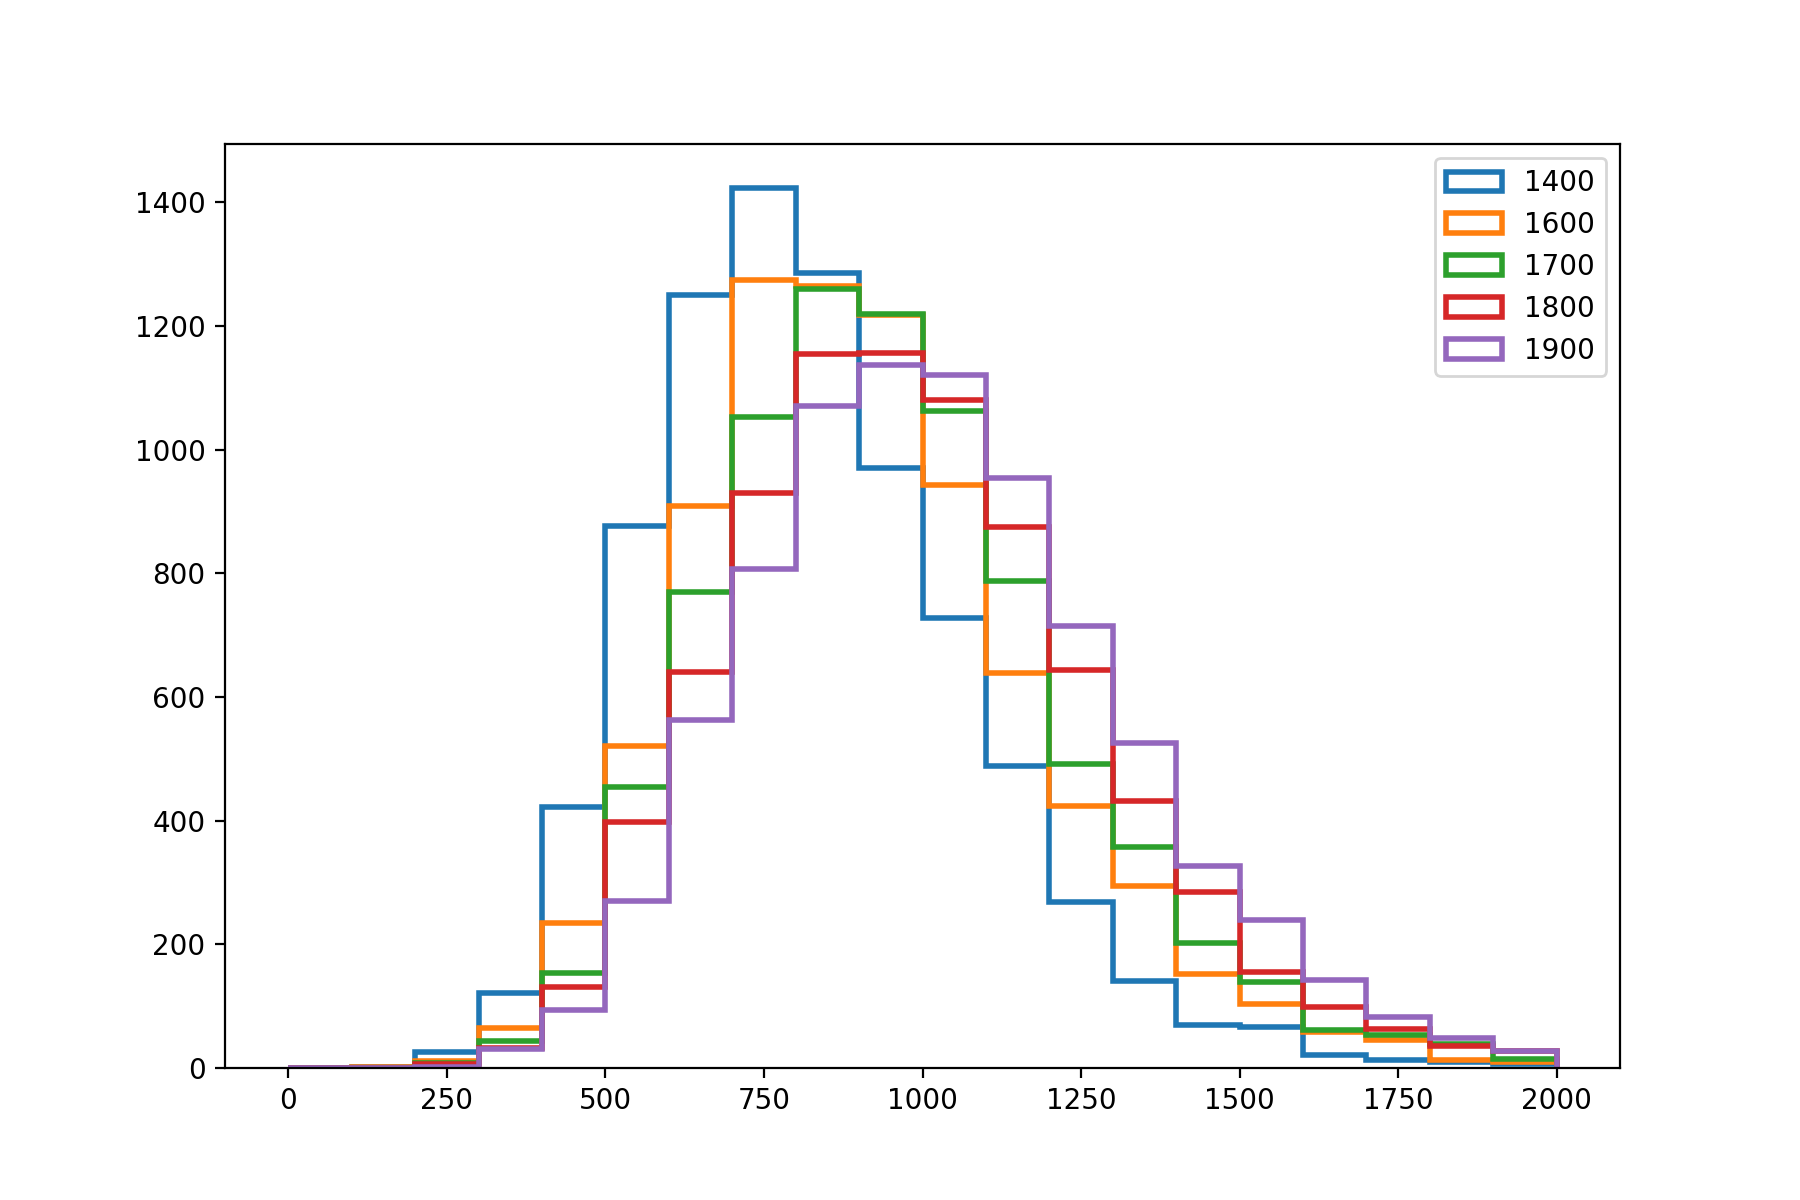

In [12]:
# Zoom in on the mass plot
plt.figure(figsize=(9, 6))
for v, label in zip(variables, labels):
    plt.hist(v['sumMass']*1e-3, bins=20, range=(0, 2e3), log=False, histtype='step', linewidth=2, label=label)
plt.legend(loc=0)